# 190320 Gaussian Mixture Model-VI-2D  别人的

In [44]:
"""
Posterior sampling for 2D-Gaussian Mixture Model using Mean-Field VI
"""
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# quantity of clustering 
K = 4

# Generate data
X1 = np.random.multivariate_normal([-5, -5], np.diag([2, 0.5])*7, size=100)
X2 = np.random.multivariate_normal([18, 18], np.diag([0.7, 1])*7, size=100)
X3 = np.random.multivariate_normal([10, 10], np.diag([1.7, 1])*7, size=100)
X4 = np.random.multivariate_normal([5, 5], np.diag([0.7, 0.6])*7, size=100)
X = np.vstack([X1, X2,X3,X4])
print('X data shape = ',X.shape)

N = X.shape[0]

print('Total quantity of all data:\n\tN = ',N)
print('Quantity of clustering:\n\tK=',K)

# GMM params initialization
mu = np.array([[10, 10], [-5, -5],[5, 5], [14, 14]], dtype=float)
var = np.array([1, 1,1,1], dtype=float)
phi = np.zeros([N, K]) + 1/K
c_matrix = np.random.randint(K, size=N)  # Assignments

# Priors
#很重要一点在于，   并没有一味地 把var 矩阵化， 而是通过mean-field theory   把var 都当做 var[k]*I 
var0 = 1

for it in range(100):
    # phi part
    # Update variational param phi, the assignment probs
    for k in range(K):
        phi[:, k] = np.exp(X @ mu[k] - (2*var[k] + mu[k].T @ mu[k])/2)
    
    
    
    # Normalize
    phi /= np.sum(phi, axis=1)[:, np.newaxis]
    # Update assignments
    c_matrix = np.argmax(phi, axis=1)

    
    
    # Update variational param mu and var, the params of Gaussian component
    for k in range(K):
        sum_phi = np.sum(phi[:, k])
        mu[k] = phi[:, k] @ X / (1/var0 + sum_phi)
        var[k] = 1 / (1/var0 + sum_phi)


# Expected output:
# ----------------
# 20 data in cluster-0, mean: [ -5  -5 ]
# 20 data in cluster-1, mean: [ 18  18 ]
for k in range(K):
    n = np.sum(c_matrix == k)
    print('\n{} data in cluster {}, \n\tmean: {},\n\tvar:{}'.format(n, k+1, mu[k],var[k]))

X data shape =  (400, 2)
Total quantity of all data:
	N =  400
Quantity of clustering:
	K= 4

87 data in cluster 1, 
	mean: [10.40483542  9.78302302],
	var:0.011344823305839212

98 data in cluster 2, 
	mean: [-4.79116011 -4.99987422],
	var:0.010099378683730356

112 data in cluster 3, 
	mean: [4.45018154 5.26879993],
	var:0.00886535410962215

103 data in cluster 4, 
	mean: [17.67066847 17.69321446],
	var:0.009611740915241876


In [45]:
print(c_matrix)

[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 2 0 0 0 0 2 0 0 2 0 0 2 0 2 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 0 0 0 2 0 2 0 2 0 0 0 2 0 0 0
 0 2 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2]


# visualization

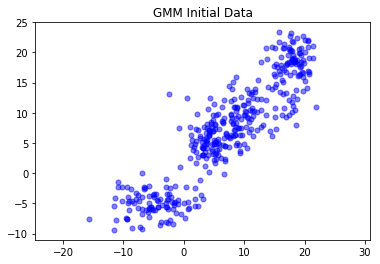

In [49]:
x_draw = np.asarray(X[:,0])
y_draw = np.asarray(X[:,1])
x_draw_center = np.asarray(mu[:,0])
y_draw_center = np.asarray(mu[:,1])
color_type = ['r','b','g','y']


color_list = np.asarray(X[:,0])
ax = plt.gca()
ax.cla() # clear things for fresh plot
# plt.figure()
plt.scatter(x_draw, y_draw,c='b',s=25,alpha=0.5,marker='o')    #T散点颜色，s散点大小，alpha透明度，marker散点形状
# plt.scatter(x_draw_center, y_draw_center,c='r',s=25,alpha=0.9,marker='*')    #T散点颜色，s散点大小，alpha透明度，marker散点形状
plt.title('GMM Initial Data')
for i in range(4):
    circle1 = plt.Circle((x_draw_center[i], y_draw_center[i]), 500*var[i], color='r', fill=True,alpha=0.4)
#     ax.add_artist(circle1)
ax.axis('equal')
plt.show()

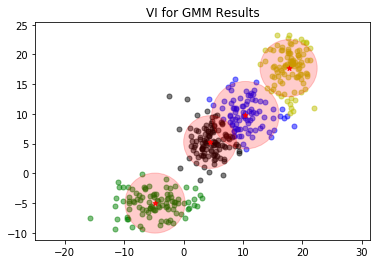

In [50]:

ax = plt.gca()
ax.cla() # clear things for fresh plot
plt.title('VI for GMM Results')
order=np.zeros(N)
color=['b','g','k','y']
for i in range(N):
#     for j in range(k):
#         if phi[i,j]==max(phi[i,:]):
#             order[i]=j             #选出X[i,:]属于第几个高斯模型
    plt.scatter(X[i, 0], X[i, 1],c=color[int(c_matrix[i])], s=25,  alpha=0.5, marker='o')      #绘制分类后的散点图
        #绘制三维图像
plt.scatter(x_draw_center, y_draw_center,c='r',s=25,alpha=0.9,marker='*')    #T散点颜色，s散点大小，alpha透明度，marker散点形状
for i in range(4):
    circle1 = plt.Circle((x_draw_center[i], y_draw_center[i]), 500*var[i], color='r', fill=True,alpha=0.2)
    ax.add_artist(circle1)
ax.axis('equal')
plt.show()

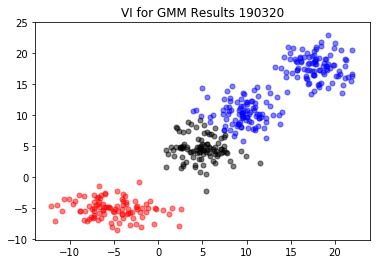

In [36]:
plt.figure()
plt.title('VI for GMM Results 190320')
order=np.zeros(N)
color=['b','r','k','y']
for i in range(N):
    for j in range(k):
        if phi[i,j]==max(phi[i,:]):
            order[i]=j             #选出X[i,:]属于第几个高斯模型
    plt.scatter(X[i, 0], X[i, 1],c=color[int(order[i])], s=25,  alpha=0.5, marker='o')      #绘制分类后的散点图
        #绘制三维图像
plt.show()

# , c=color[int(c[i])]

# 画原始数据

# 主程序